In this example, using the same data set, we will compare the results using some of the main
clustering algorithms.


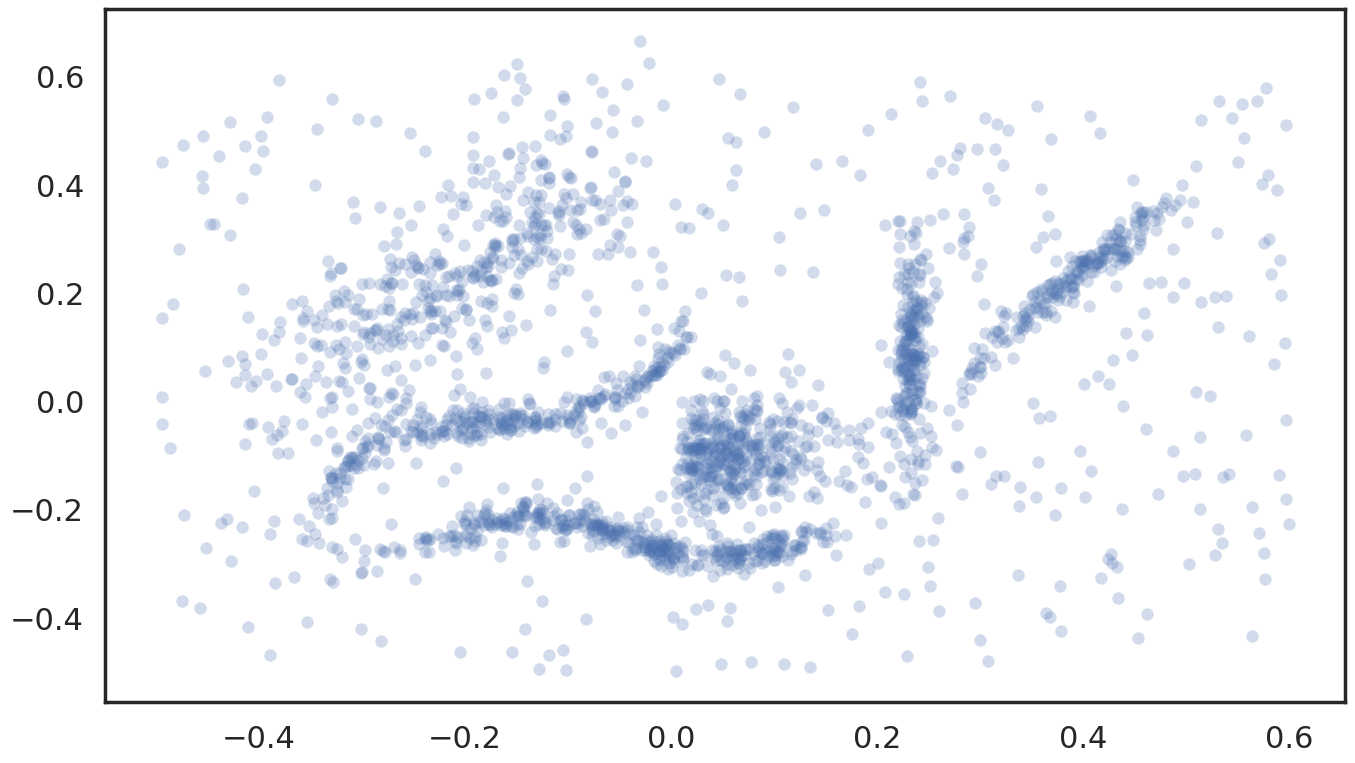

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster

#read data and visualize

data = np.load('clusterable_data.npy')

sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
plt.show()


In [87]:
def plot_clusters(data, algorythm, args, kwds):
  labels = algorythm(*args, **kwds).fit_predict(data)
  palette = sns.color_palette('deep', np.unique(labels).max() +1)
  colors= [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
  plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

  plt.title('Clusters found by {}'.format(str(algorythm.__name__)), fontsize=24)

# KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


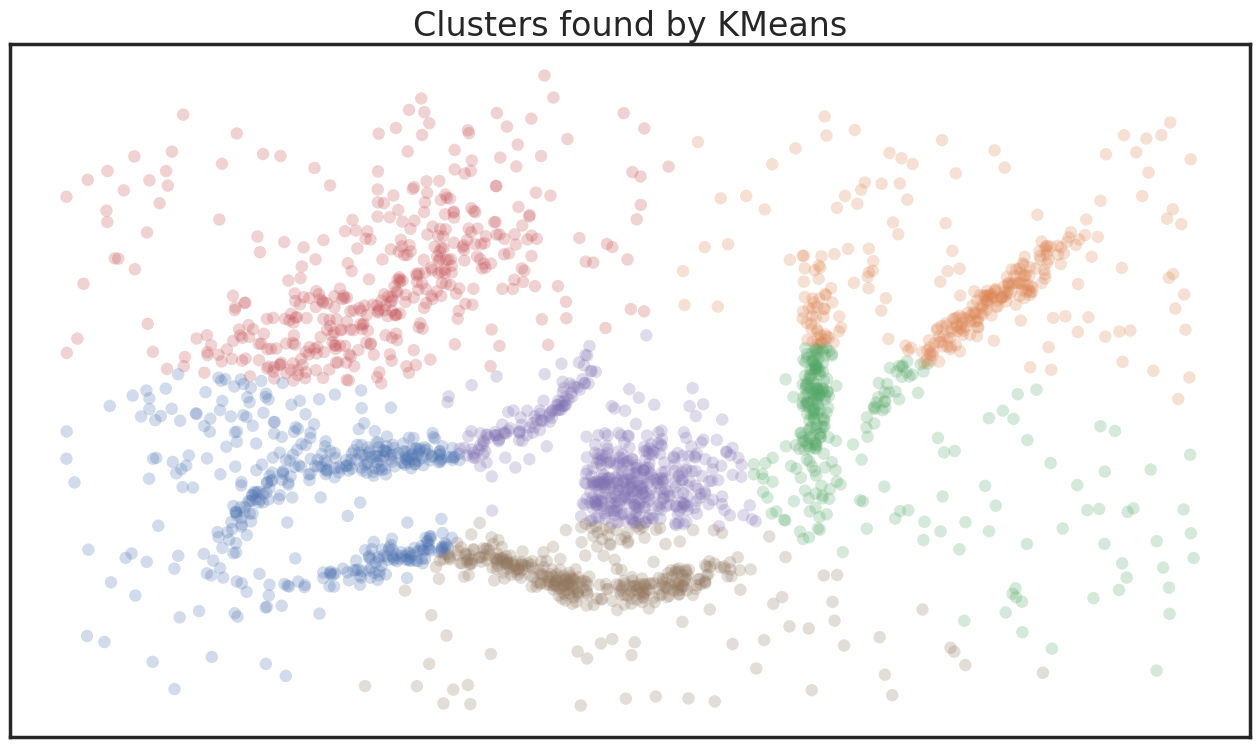

In [94]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

# Affinity Propagation

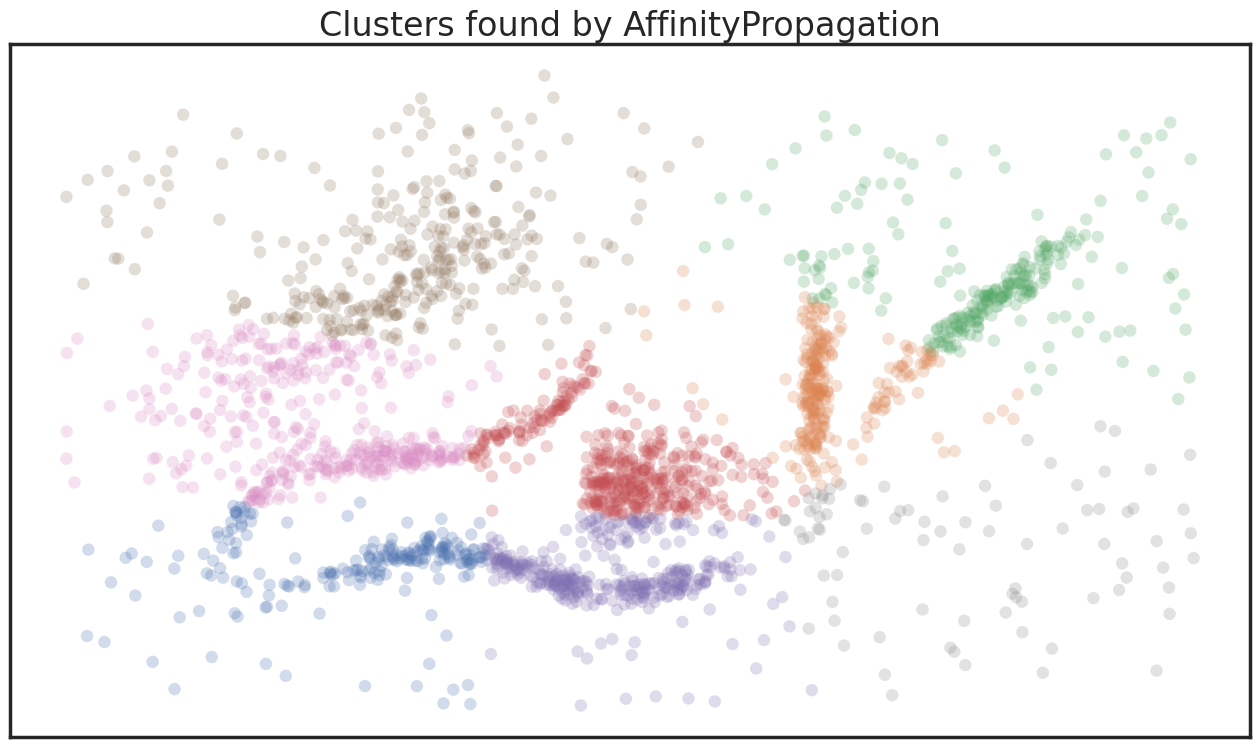

In [93]:
plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

# Mean Shift

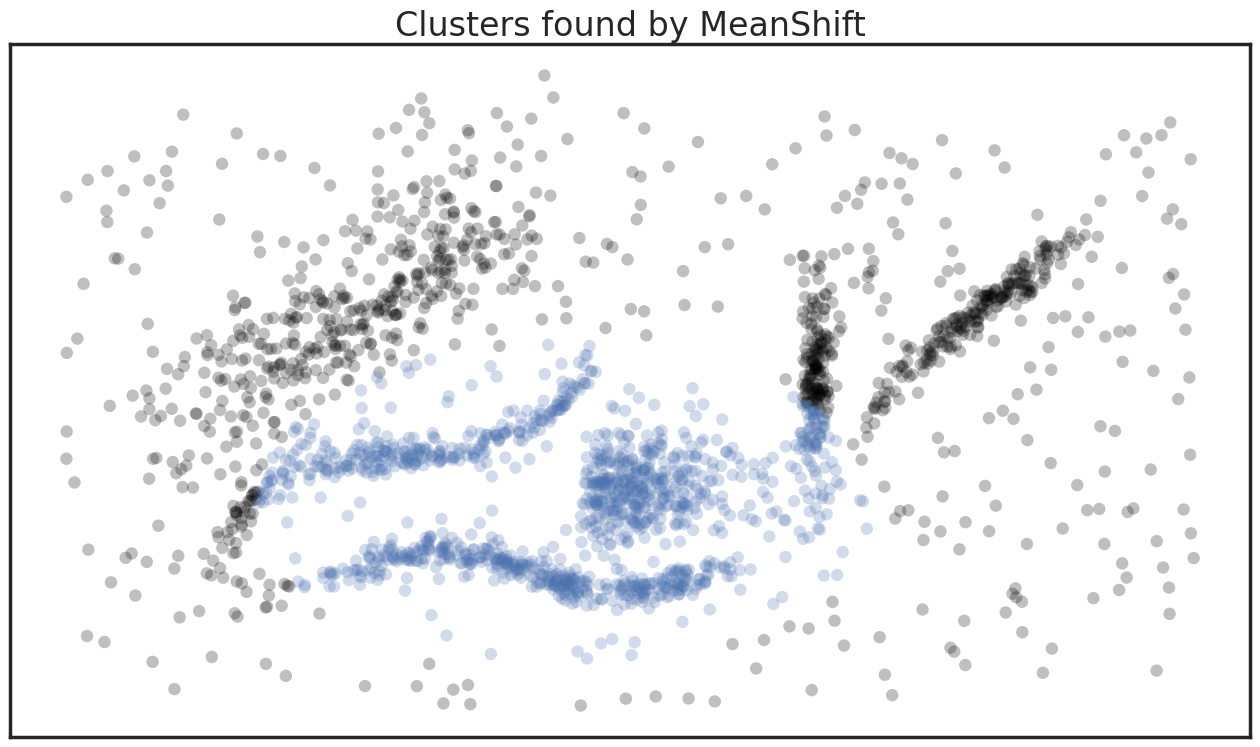

In [92]:
plot_clusters(data, cluster.MeanShift, (), {'cluster_all':False})

# Spectral

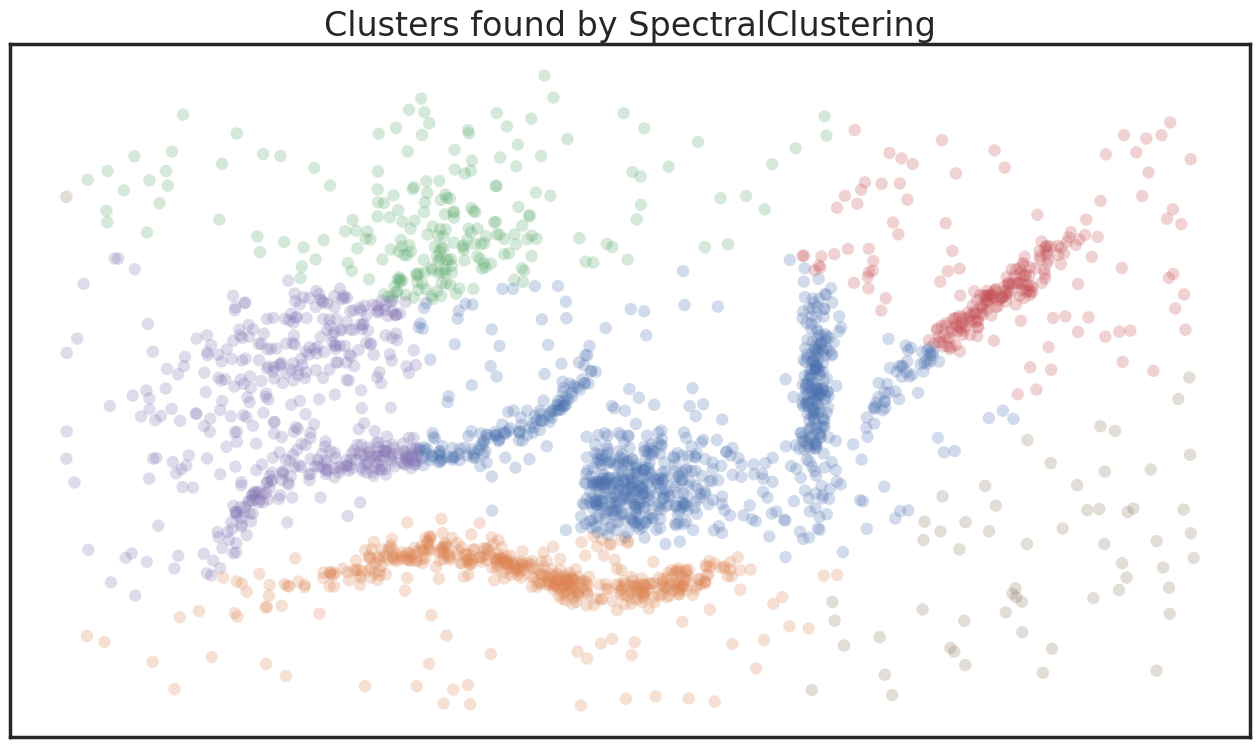

In [95]:
plot_clusters(data, cluster.SpectralClustering, (), {'n_clusters':6})

# Agglomerative

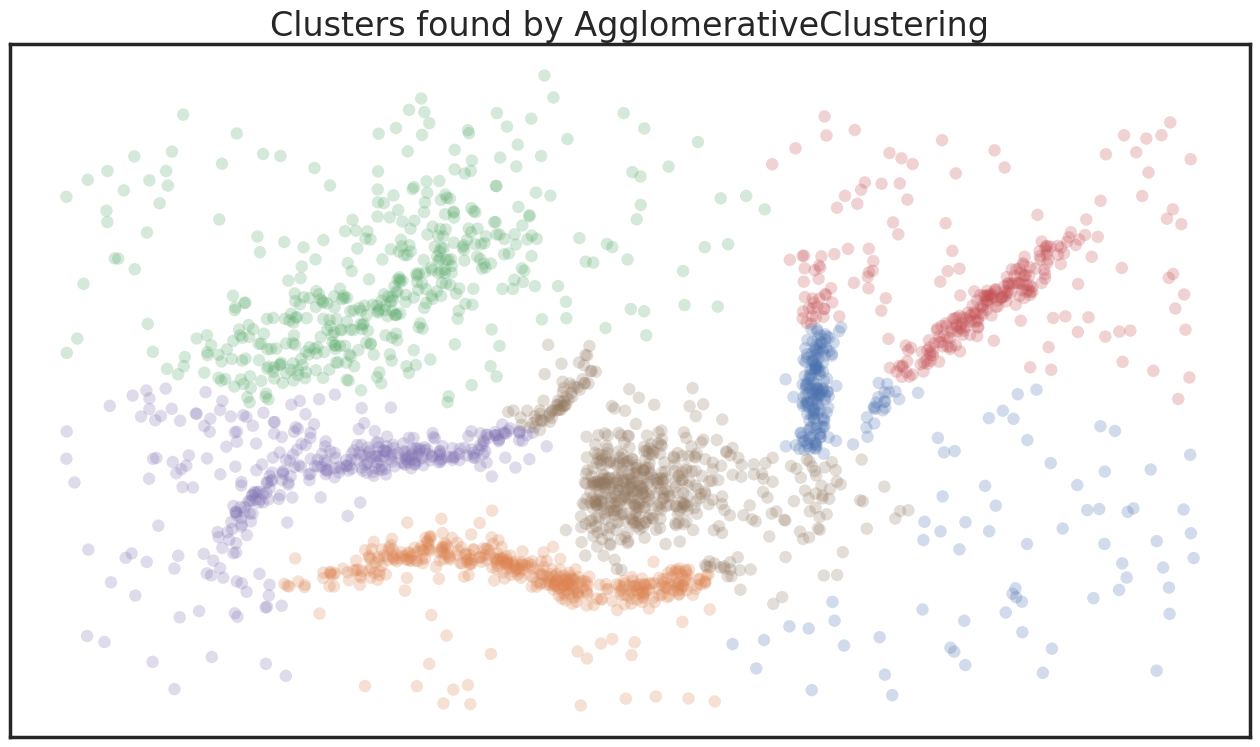

In [96]:
plot_clusters(data, cluster.AgglomerativeClustering, (), {'n_clusters':6, 'linkage':'ward'})

# DBSCAN

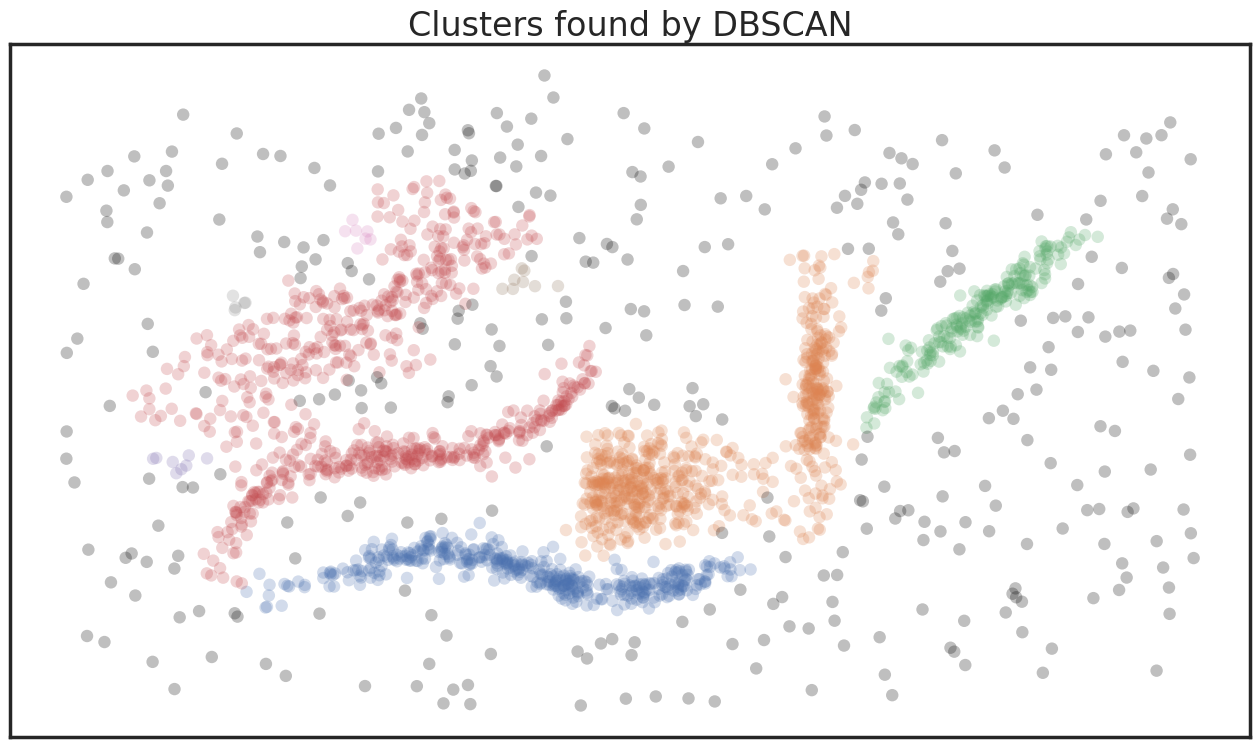

In [97]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})